In [4]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

# Reading data

In [5]:
data = pd.read_csv("card_transdata.csv")

# Exploratory Data Analysis :Understanding the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
distance_from_home                1000000 non-null float64
distance_from_last_transaction    1000000 non-null float64
ratio_to_median_purchase_price    1000000 non-null float64
repeat_retailer                   1000000 non-null float64
used_chip                         1000000 non-null float64
used_pin_number                   1000000 non-null float64
online_order                      1000000 non-null float64
fraud                             1000000 non-null float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
data.duplicated().value_counts() # There is no Duplicate data

False    1000000
dtype: int64

# There is no null Values and no duplicate data present in our data                  

# Visualize the distribution of variables


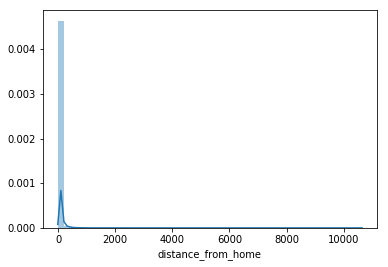

In [7]:
sns.distplot(data['distance_from_home'])

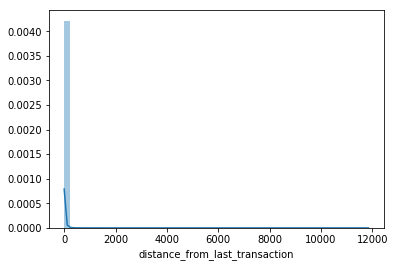

In [15]:
sns.distplot(data['distance_from_last_transaction'])

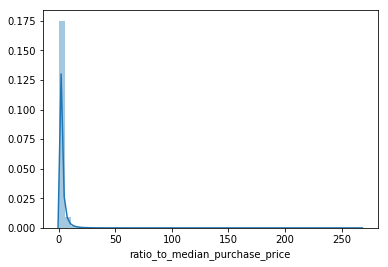

In [16]:
sns.distplot(data['ratio_to_median_purchase_price'])

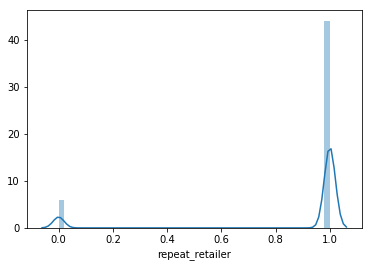

In [17]:
sns.distplot(data['repeat_retailer'])

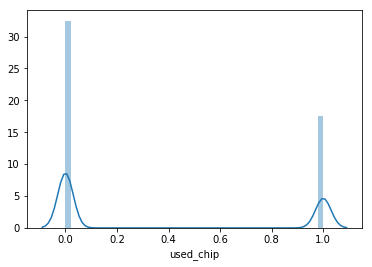

In [18]:
sns.distplot(data['used_chip'])#                         1000000 non-null float64


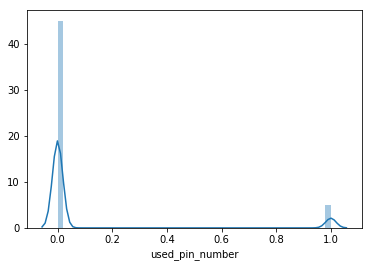

In [20]:
sns.distplot(data['used_pin_number'])#                   1000000 non-null float64


Text(0.5, 1.0, 'lalala')

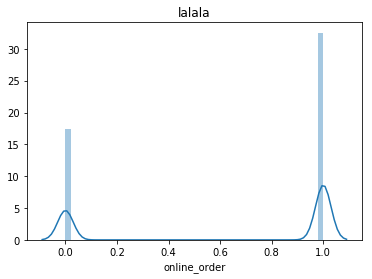

In [21]:
sns.distplot(data['online_order']).set_title('lalala')

Text(0.5, 1.0, 'Target Variable')

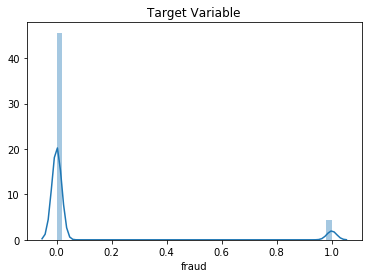

In [22]:
sns.distplot(data['fraud']).set_title('Target Variable')

# Ratio of Target class :(Balanced or Imbalanced Data)

In [5]:
# Determine number of fraud cases in dataset
Fraud = data[data['fraud'] == 1.0]
Valid = data[data['fraud'] == 0.0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['fraud'] == 1.0])))
print('Valid Transactions: {}'.format(len(data[data['fraud'] == 0.0])))

0.09577392868922427
Fraud Cases: 87403
Valid Transactions: 912597


0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0.0: No Fraud || 1.0: Fraud)')

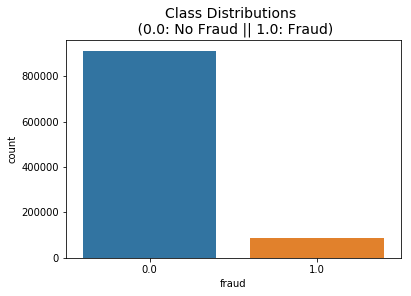

In [9]:
#Percentage of fraud and valid transactions
Occurance = data['fraud'].value_counts()
Percentage= Occurance/len(data.index)*100
print(Percentage)
#Distribution of Fraud and No Fraud
sns.countplot('fraud', data=data)
plt.title('Class Distributions \n (0.0: No Fraud || 1.0: Fraud)', fontsize=14)




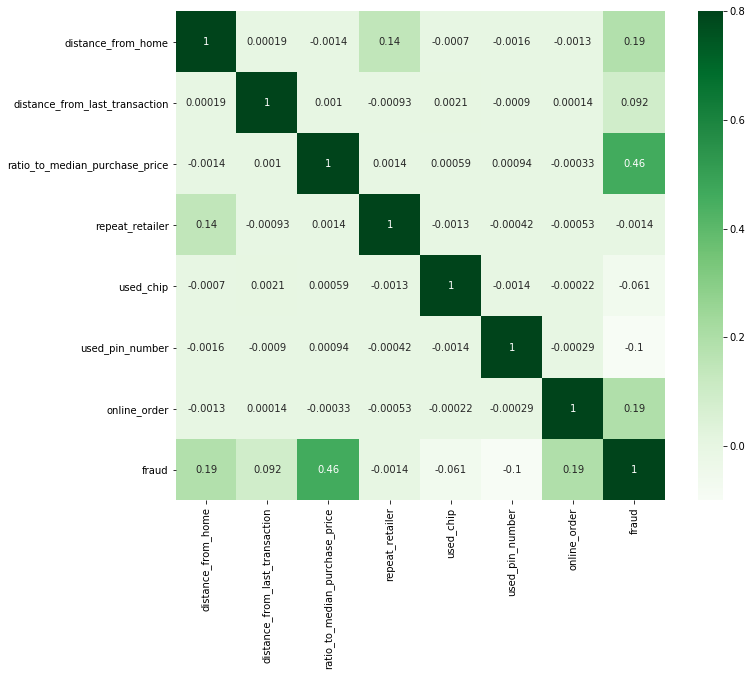

In [8]:
# Correlation matrix
colormap= plt.cm.Greens
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True,cmap=colormap,annot=True)
plt.show()

# Preparing Independent and Dependent features

In [11]:
features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
# The target variable which we would like to predict, is the 'Class' variable
target = 'fraud'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]


# Splitting the data in Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Logistic Regression with imbalanced data

In [13]:
model = LogisticRegression(max_iter=7600)

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print("Accuracy : ",score)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))
############################################################################
#LogisticRegression with balanced data
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X_train, y_train)

model = LogisticRegression(max_iter=10000)

# Train the model using 'fit' method
model.fit(X_sm, y_sm)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

score = model.score(X_sm, y_sm)
print(score)

# Print the classification report 
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.958495
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182383
         1.0       0.90      0.60      0.72     17617

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.85    200000
weighted avg       0.96      0.96      0.95    200000

0.7949924514680478
confusion matrix [[181190   1193]
 [  7108  10509]]
0.9417739183307907
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182383
         1.0       0.58      0.95      0.72     17617

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

0.9401786210024861
[[170273  12110]
 [   938  16679]]


# Precision and recall is not high 

# Random Forest with balanced and Imabalanced data

In [14]:
#RandomForestClassifier with imbalanced data
model = RandomForestClassifier(random_state=42)

model.fit(X_train,y_train)

predict = model.predict(X_test)

print(metrics.accuracy_score(y_test, predict))


average_precision = average_precision_score(y_test, predict)

#obtain precision and recall

precision, recall, _ = precision_recall_curve(y_test, predict)


print(confusion_matrix(y_test,predict))

0.999995
[[182383      0]
 [     1  17616]]


In [16]:
print(classification_report(y_test,predict))
print(roc_auc_score(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182383
         1.0       1.00      1.00      1.00     17617

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

0.9999716183232106


AUC: 1.00


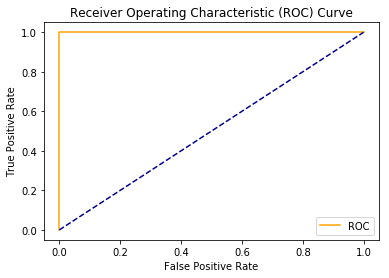

In [18]:
#Plotting ROC AUC Curve
from sklearn import metrics
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_predict_proba = model.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_predict_proba[:,1])
print('AUC: %.2f' % auc_score)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba[:,1])
plot_roc_curve(fpr, tpr)


Feature ranking:
1. feature 2 (0.519323)
2. feature 6 (0.178109)
3. feature 0 (0.134286)
4. feature 5 (0.064312)
5. feature 4 (0.052295)
6. feature 1 (0.044560)
7. feature 3 (0.007115)


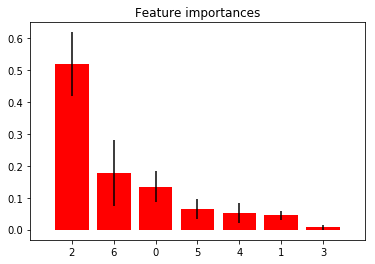

In [15]:
import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

0 = 'distance_from_home'                                                                           
1 = 'distance_from_last_transaction'                                                              
2 = 'ratio_to_median_purchase_price'                                                                  
3 = 'repeat_retailer'                                                                    
4 = 'used_chip'                                                                             
5 = 'used_pin_number'                                                                    
6 = 'online_order'                                                     

# RandomForestClassifier with SMOTE


In [ ]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X_train, y_train)


model = RandomForestClassifier(random_state=42)

model.fit(X_sm,y_sm)


In [21]:
predict = model.predict(X_test)

print(metrics.accuracy_score(y_test, predict))
average_precision = average_precision_score(y_test, predict)
precision, recall, _ = precision_recall_curve(y_test, predict)
print(confusion_matrix(y_test,predict))

0.999985
[[182383      0]
 [     3  17614]]


In [22]:
predict_test = model.predict(X_test)
print(classification_report(y_test,predict_test))
print(roc_auc_score(y_test,predict_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182383
         1.0       1.00      1.00      1.00     17617

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

0.9999148549696316


# Using K-fold for 10 fold to check accuracy,precision and recall of each model

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(random_state=42)
result = cross_validate(model, X, y, cv=kfold, scoring = ['accuracy', 'precision','f1','recall'])
print(result)

{'fit_time': array([224.16771245, 215.58162665, 216.57119012, 203.76927328,
       207.07989526, 208.77186799, 205.06087279, 203.08674335,
       213.75654149, 197.35940933]), 'score_time': array([1.97576547, 1.98374391, 1.92994452, 1.94280696, 1.97572374,
       1.95478368, 1.94580555, 1.94779062, 1.95574117, 1.90890527]), 'test_accuracy': array([1.     , 1.     , 1.     , 0.99997, 0.99998, 1.     , 1.     ,
       0.99999, 0.99998, 0.99998]), 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_f1': array([1.        , 1.        , 1.        , 0.99983232, 0.99988656,
       1.        , 1.        , 0.99994298, 0.99988532, 0.99988498]), 'test_recall': array([1.        , 1.        , 1.        , 0.99966469, 0.99977314,
       1.        , 1.        , 0.99988597, 0.99977067, 0.99976998])}


# Saving the model for predicting fraud cases

In [41]:
import pickle

In [42]:
filename = 'Randomforest_model.sav'
pickle.dump(model, open(filename, 'wb'))